In [17]:
import sys
import os

import matplotlib.pyplot as plt

from Mala.mala import MALAKernel

# Add the parent directory to sys.path so Python can find the files
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [18]:
from EKI.eki import *
from EKI.stopping_rules import *
from EKI.uq import *
from ForwardModels.models import *
from Utils.tools import *

In [19]:
def run(dim_parameters, dim_observations, p, beta, num_particles, noise_level=1e-6):
    """Run a simple EKI example."""
    # Set random seed for reproducibility
    key = random.PRNGKey(42)

    forward_model = LinearForwardModel(
        dim_parameters, dim_observations, p, coef=1
    )
    i_array =jnp.linspace(1, dim_parameters, dim_parameters)

    f0 = jnp.apply_along_axis(lambda x: (5*jnp.sin(0.5*x))*x ** (-beta), 0, i_array)

    y_true = forward_model.evaluate(f0) #(dim_parms, )

    # Add noise to observations
    key, subkey = random.split(key)
    noise = noise_level * random.normal(subkey, y_true.shape)
    observations = y_true + noise
    plt.plot(i_array, f0)
    plt.plot(i_array, y_true)
    plt.show()

    plt.show()
    prior_cov = GaussianKernel(dim_parameters, 2)._operator_fourier
    # Initialize EKI solver
    eki = EKI(
        forward_model=forward_model,
        observations=observations,
        dim_parameters=dim_parameters,
        num_particles=num_particles,
        init_covariance=prior_cov,
        init_mean=jnp.zeros(dim_parameters),
        noise_level=noise_level,
        time_interval=(1, 150.0, 200),  # (start, end, max_steps)
        rng_key=key,
    )

    # Create stopping rule: Discrepancy principle
    stopping_rule = DiscrepancyPrinciple(
        effective_dim=dim_observations,
        tolerance=noise_level,
        kappa=1,
        max_iterations=100,
    )

    # Run the algorithm with early stopping
    results = eki.fit(stopping_rule=stopping_rule)

    # Print results
    print(f"\nAlgorithm converged: {results['converged']}")
    print(f"Stopping time: {results['stopping_time']}")
    print(f"Final residual: {results['final_residual']:.6f}")

    return results, f0

In [20]:
i_array =jnp.linspace(1, 100, 100)

f0 = jnp.apply_along_axis(lambda x: (5*jnp.sin(0.5*x))*x ** (-1), 0, i_array)

gi = jnp.apply_along_axis(lambda x:  (x ** (-1/2)), 0, i_array)

G = jnp.diag(gi)
y_true  = G@f0

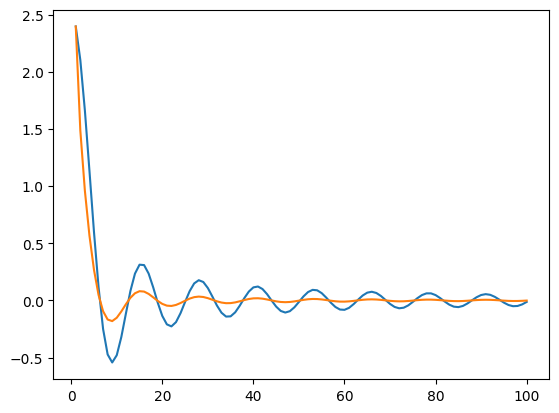

In [21]:
plt.plot(i_array, f0)
plt.plot(i_array, y_true)
plt.show()

In [22]:
# Problem parameters
dim_parameters = 100
dim_observations = 100
p = 1/2
beta = 1
num_particles = 100

noise_levels = [1e-2,1e-4,1e-6,1e-8]
print(noise_levels)

[0.01, 0.0001, 1e-06, 1e-08]


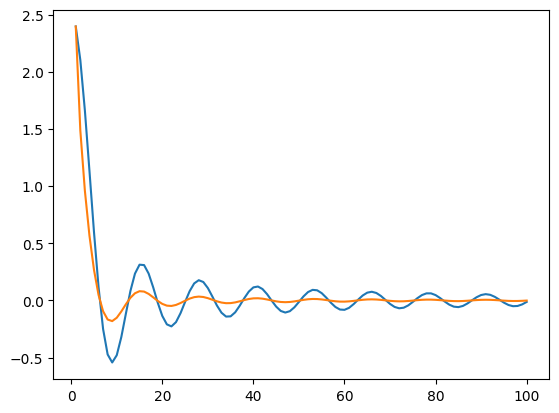

0
1
2
3
converged

Algorithm converged: True
Stopping time: 3
Final residual: 0.964625


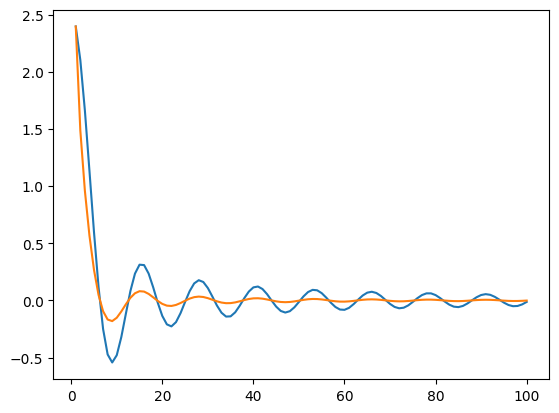

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198

Algorithm converged: None
Stopping time: 198
Final residual: 0.129264


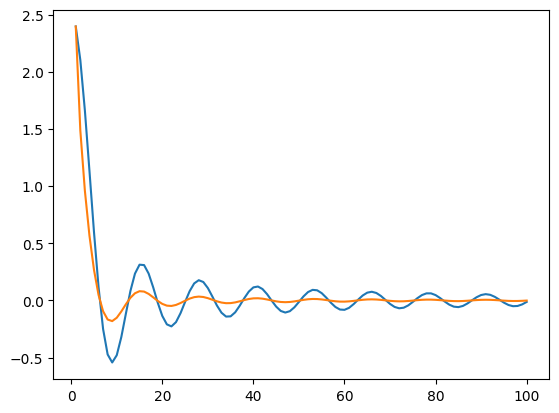

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198

Algorithm converged: None
Stopping time: 198
Final residual: 0.047882


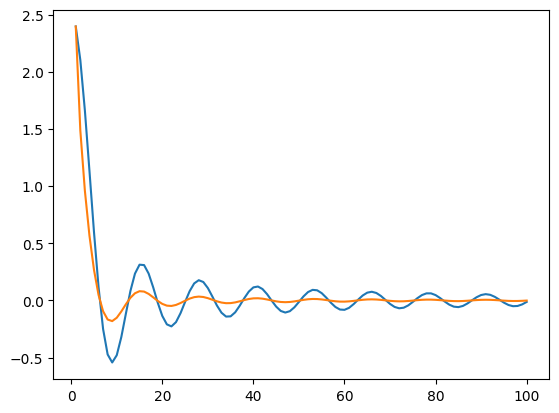

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198

Algorithm converged: None
Stopping time: 198
Final residual: 0.015265


In [23]:
results_list = []
for noise_level in noise_levels:
    results, f0 = run(dim_parameters, dim_observations, p, beta, num_particles, noise_level)
    results_list.append(results)

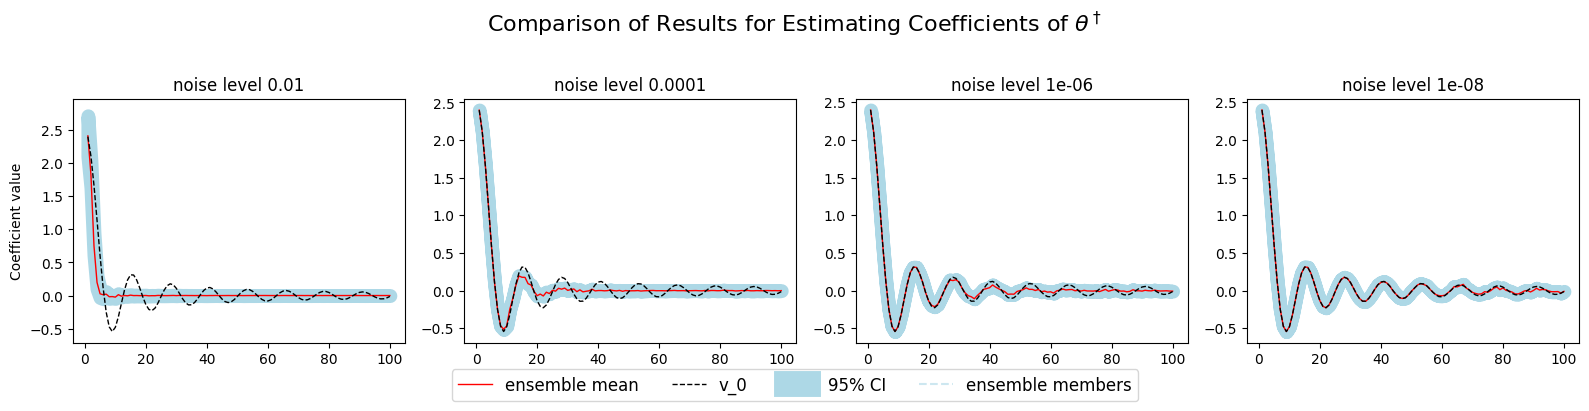

In [25]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Define your arrays
i_array = jnp.linspace(1, 100, 100)
q = jnp.array([0.025, 0.975])

# Create a figure with subplots based on the number of results
num_results = len(results_list)
fig, axes = plt.subplots(1, num_results, figsize=(4*num_results, 4), sharex=True)

# If there's only one result, axes won't be iterable, so we handle that case
if num_results == 1:
    axes = [axes]

# Store legend handles and labels from the first subplot
legend_handles = []
legend_labels = []

# Loop through the results and create a plot for each one
for i, results in enumerate(results_list):
    hat_coefs_v0_ensemble = results["ensemble_history"][-1]

    # Plot on the current subplot
    ax = axes[i]

    # Plot individual ensemble members (without label for subsequent plots)
    ensemble_members_handle = ax.plot(
        i_array, hat_coefs_v0_ensemble,
        color="lightblue", linestyle="dashed", alpha=0.6
    )

    # Plot ensemble mean
    ensemble_mean_handle, = ax.plot(
        i_array, jnp.mean(hat_coefs_v0_ensemble, axis=1),
        color="red", linewidth=1, label="ensemble mean"
    )

    # Plot true v0
    v0_handle, = ax.plot(i_array, f0, color="black", label="v_0",
                        linestyle="dashed", linewidth=1)

    # Plot quantiles with fill_between for better visualization
    quantiles = jnp.quantile(hat_coefs_v0_ensemble, q, axis=1)
    fill_handle = ax.fill_between(
        i_array, quantiles[0], quantiles[1],
        color="lightblue", label="95% CI", linewidth=10
    )

    #ax.set_xlim(0,15)
    # Add title
    ax.set_title(f"noise level {noise_levels[i]}")



    # Add y-label only to the first subplot
    if i == 0:
        ax.set_ylabel("Coefficient value")
        # Collect legend handles and labels from the first subplot
        legend_handles.extend([ensemble_mean_handle, v0_handle, fill_handle, ensemble_members_handle[0]])
        legend_labels.extend(["ensemble mean", "v_0", "95% CI", "ensemble members"])

# Add a common title for the entire figure
fig.suptitle(r"Comparison of Results for Estimating Coefficients of $\theta^\dagger$", fontsize=16)

# Create a single legend at the bottom center
fig.legend(legend_handles, legend_labels, loc='lower center', ncol=4,
           bbox_to_anchor=(0.5, -0.02), fontsize=12)

# Adjust layout to make room for the shared legend
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()